In [7]:
import os
os.environ['OMP_NUM_THREADS'] = '1'


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Loading the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Feature engineering example
customer_transactions = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
customer_data = pd.merge(customers, customer_transactions, on='CustomerID', how='left').fillna(0)

# Preprocessing pipeline for numerical and categorical features
numerical_features = ['TotalValue', 'Quantity']
categorical_features = ['Region']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Applying the preprocessing pipeline to the data
X = customer_data[numerical_features + categorical_features]
X_preprocessed = preprocessor.fit_transform(X)

# Check the processed feature names and values
print(preprocessor.get_feature_names_out())
print(X_preprocessed[:5])


['num__TotalValue' 'num__Quantity' 'cat__Region_Asia' 'cat__Region_Europe'
 'cat__Region_North America' 'cat__Region_South America']
[[-0.05188436 -0.1107351   0.          0.          0.          1.        ]
 [-0.86271433 -0.43404927  1.          0.          0.          0.        ]
 [-0.393842    0.21257907  0.          0.          0.          1.        ]
 [ 1.03537505  1.66749283  0.          0.          0.          1.        ]
 [-0.76949861 -0.91902053  1.          0.          0.          0.        ]]


C:\Users\Revur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Revur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Revur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Revur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

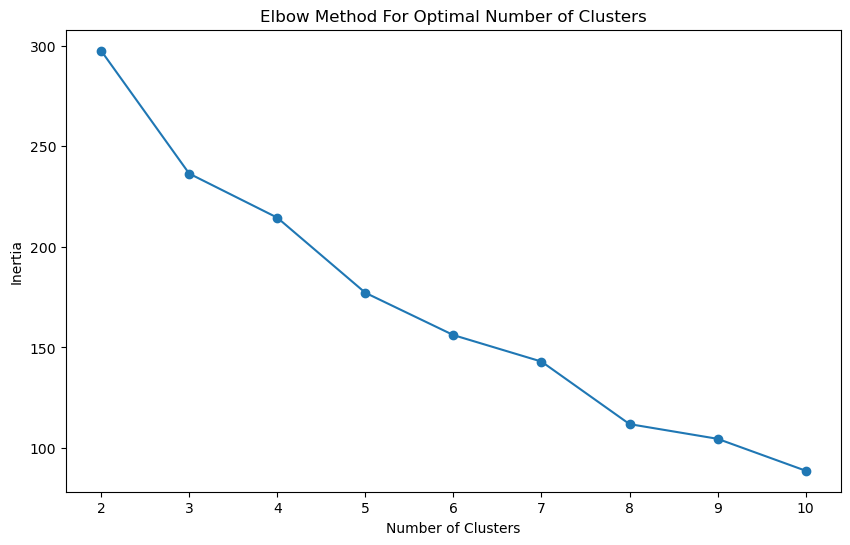

C:\Users\Revur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Determining the optimal number of clusters using the elbow method
inertia = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_preprocessed)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

# Selecting the optimal number of clusters (let's assume 5 for this example)
optimal_n_clusters = 5
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)

# Adding cluster information to the dataset
customer_data['Cluster'] = clusters


DB Index: 1.3206147686991276


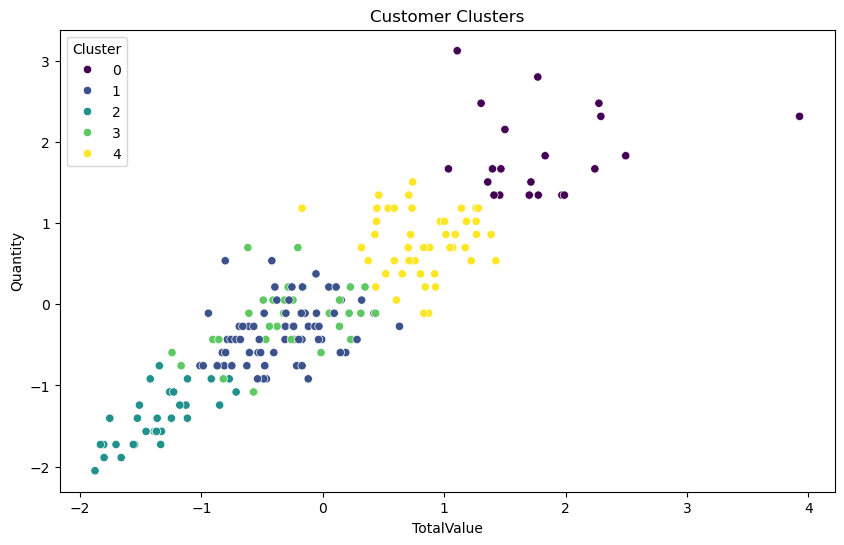

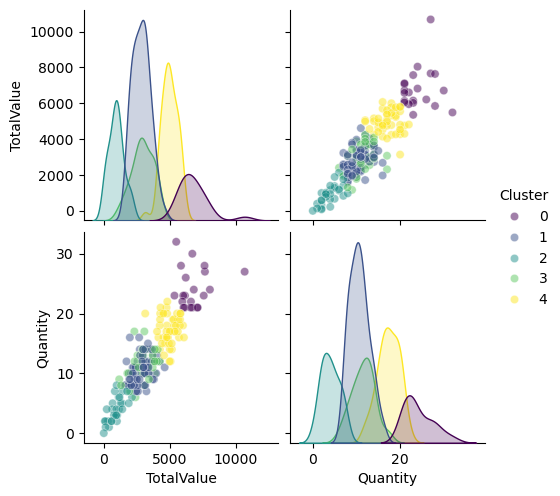

In [15]:
# Calculating DB Index
db_index = davies_bouldin_score(X_preprocessed, clusters)
print(f'DB Index: {db_index}')

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_preprocessed[:, 0], y=X_preprocessed[:, 1], hue=clusters, palette='viridis')
plt.xlabel('TotalValue')
plt.ylabel('Quantity')
plt.title('Customer Clusters')
plt.legend(title='Cluster')
plt.show()

# Visualizing with more relevant features (if available)
sns.pairplot(customer_data, hue='Cluster', palette='viridis', plot_kws={'alpha': 0.5})
plt.show()
